In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
world_Happines=pd.read_csv('rankings.csv')
world_Happines

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,1,Finland,7.821,7.886,7.756,2.518,1.892,1.258,0.775,0.736,0.109,0.534
1,2,Denmark,7.636,7.710,7.563,2.226,1.953,1.243,0.777,0.719,0.188,0.532
2,3,Iceland,7.557,7.651,7.464,2.320,1.936,1.320,0.803,0.718,0.270,0.191
3,4,Switzerland,7.512,7.586,7.437,2.153,2.026,1.226,0.822,0.677,0.147,0.461
4,5,Netherlands,7.415,7.471,7.359,2.137,1.945,1.206,0.787,0.651,0.271,0.419
...,...,...,...,...,...,...,...,...,...,...,...,...
141,142,Botswana,3.471,3.667,3.275,0.187,1.503,0.815,0.280,0.571,0.012,0.102
142,143,Rwanda,3.268,3.462,3.074,0.536,0.785,0.133,0.462,0.621,0.187,0.544
143,144,Zimbabwe,2.995,3.110,2.880,0.548,0.947,0.690,0.270,0.329,0.106,0.105
144,145,Lebanon,2.955,3.049,2.862,0.216,1.392,0.498,0.631,0.103,0.082,0.034


In [3]:
world_Happines.describe().T

,count,mean,std,min,25%,50%,75%,max
RANK,146.0,73.500000,42.290661,1.000,37.25000,73.5000,109.75000,146.000
Happiness score,146.0,5.553575,1.086843,2.404,4.88875,5.5685,6.30500,7.821
Whisker-high,146.0,5.673589,1.065621,2.469,5.00625,5.6800,6.44875,7.886
Whisker-low,146.0,5.433568,1.109380,2.339,4.75475,5.4530,6.19000,7.756
Dystopia (1.83) + residual,146.0,1.831808,0.534994,0.187,1.55525,1.8945,2.15300,2.844
Explained by: GDP per capita,146.0,1.410445,0.421663,0.000,1.09550,1.4455,1.78475,2.209
Explained by: Social support,146.0,0.905863,0.280122,0.000,0.73200,0.9575,1.11425,1.320
Explained by: Healthy life expectancy,146.0,0.586171,0.176336,0.000,0.46325,0.6215,0.71975,0.942
Explained by: Freedom to make life choices,146.0,0.517226,0.145859,0.000,0.44050,0.5435,0.62600,0.740
Explained by: Generosity,146.0,0.147377,0.082799,0.000,0.08900,0.1325,0.19775,0.468


In [4]:
world_Happines.isnull().sum()

RANK                                          0
Country                                       0
Happiness score                               0
Whisker-high                                  0
Whisker-low                                   0
Dystopia (1.83) + residual                    0
Explained by: GDP per capita                  0
Explained by: Social support                  0
Explained by: Healthy life expectancy         0
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
dtype: int64

In [5]:
score = world_Happines["Happiness score"]

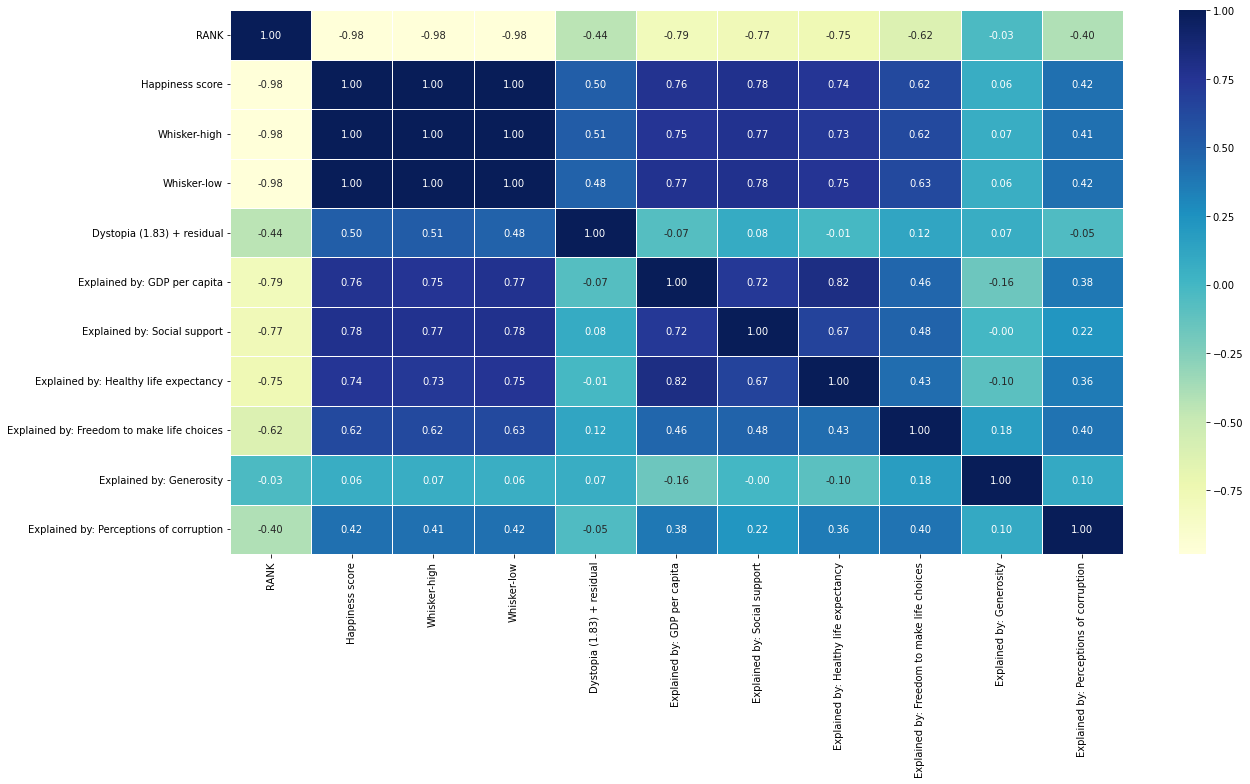

In [6]:
fig,ax=plt.subplots(figsize=(20,10))
ax=sns.heatmap(world_Happines.corr(),annot=True,linewidths=0.5,fmt='.2f',cmap='YlGnBu');

In [7]:
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number])
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]]
    columnNames = list(df)
    if len(columnNames) > 10:
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

C:\Users\Hello\AppData\Local\Temp\ipykernel_13152\3879777494.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns')


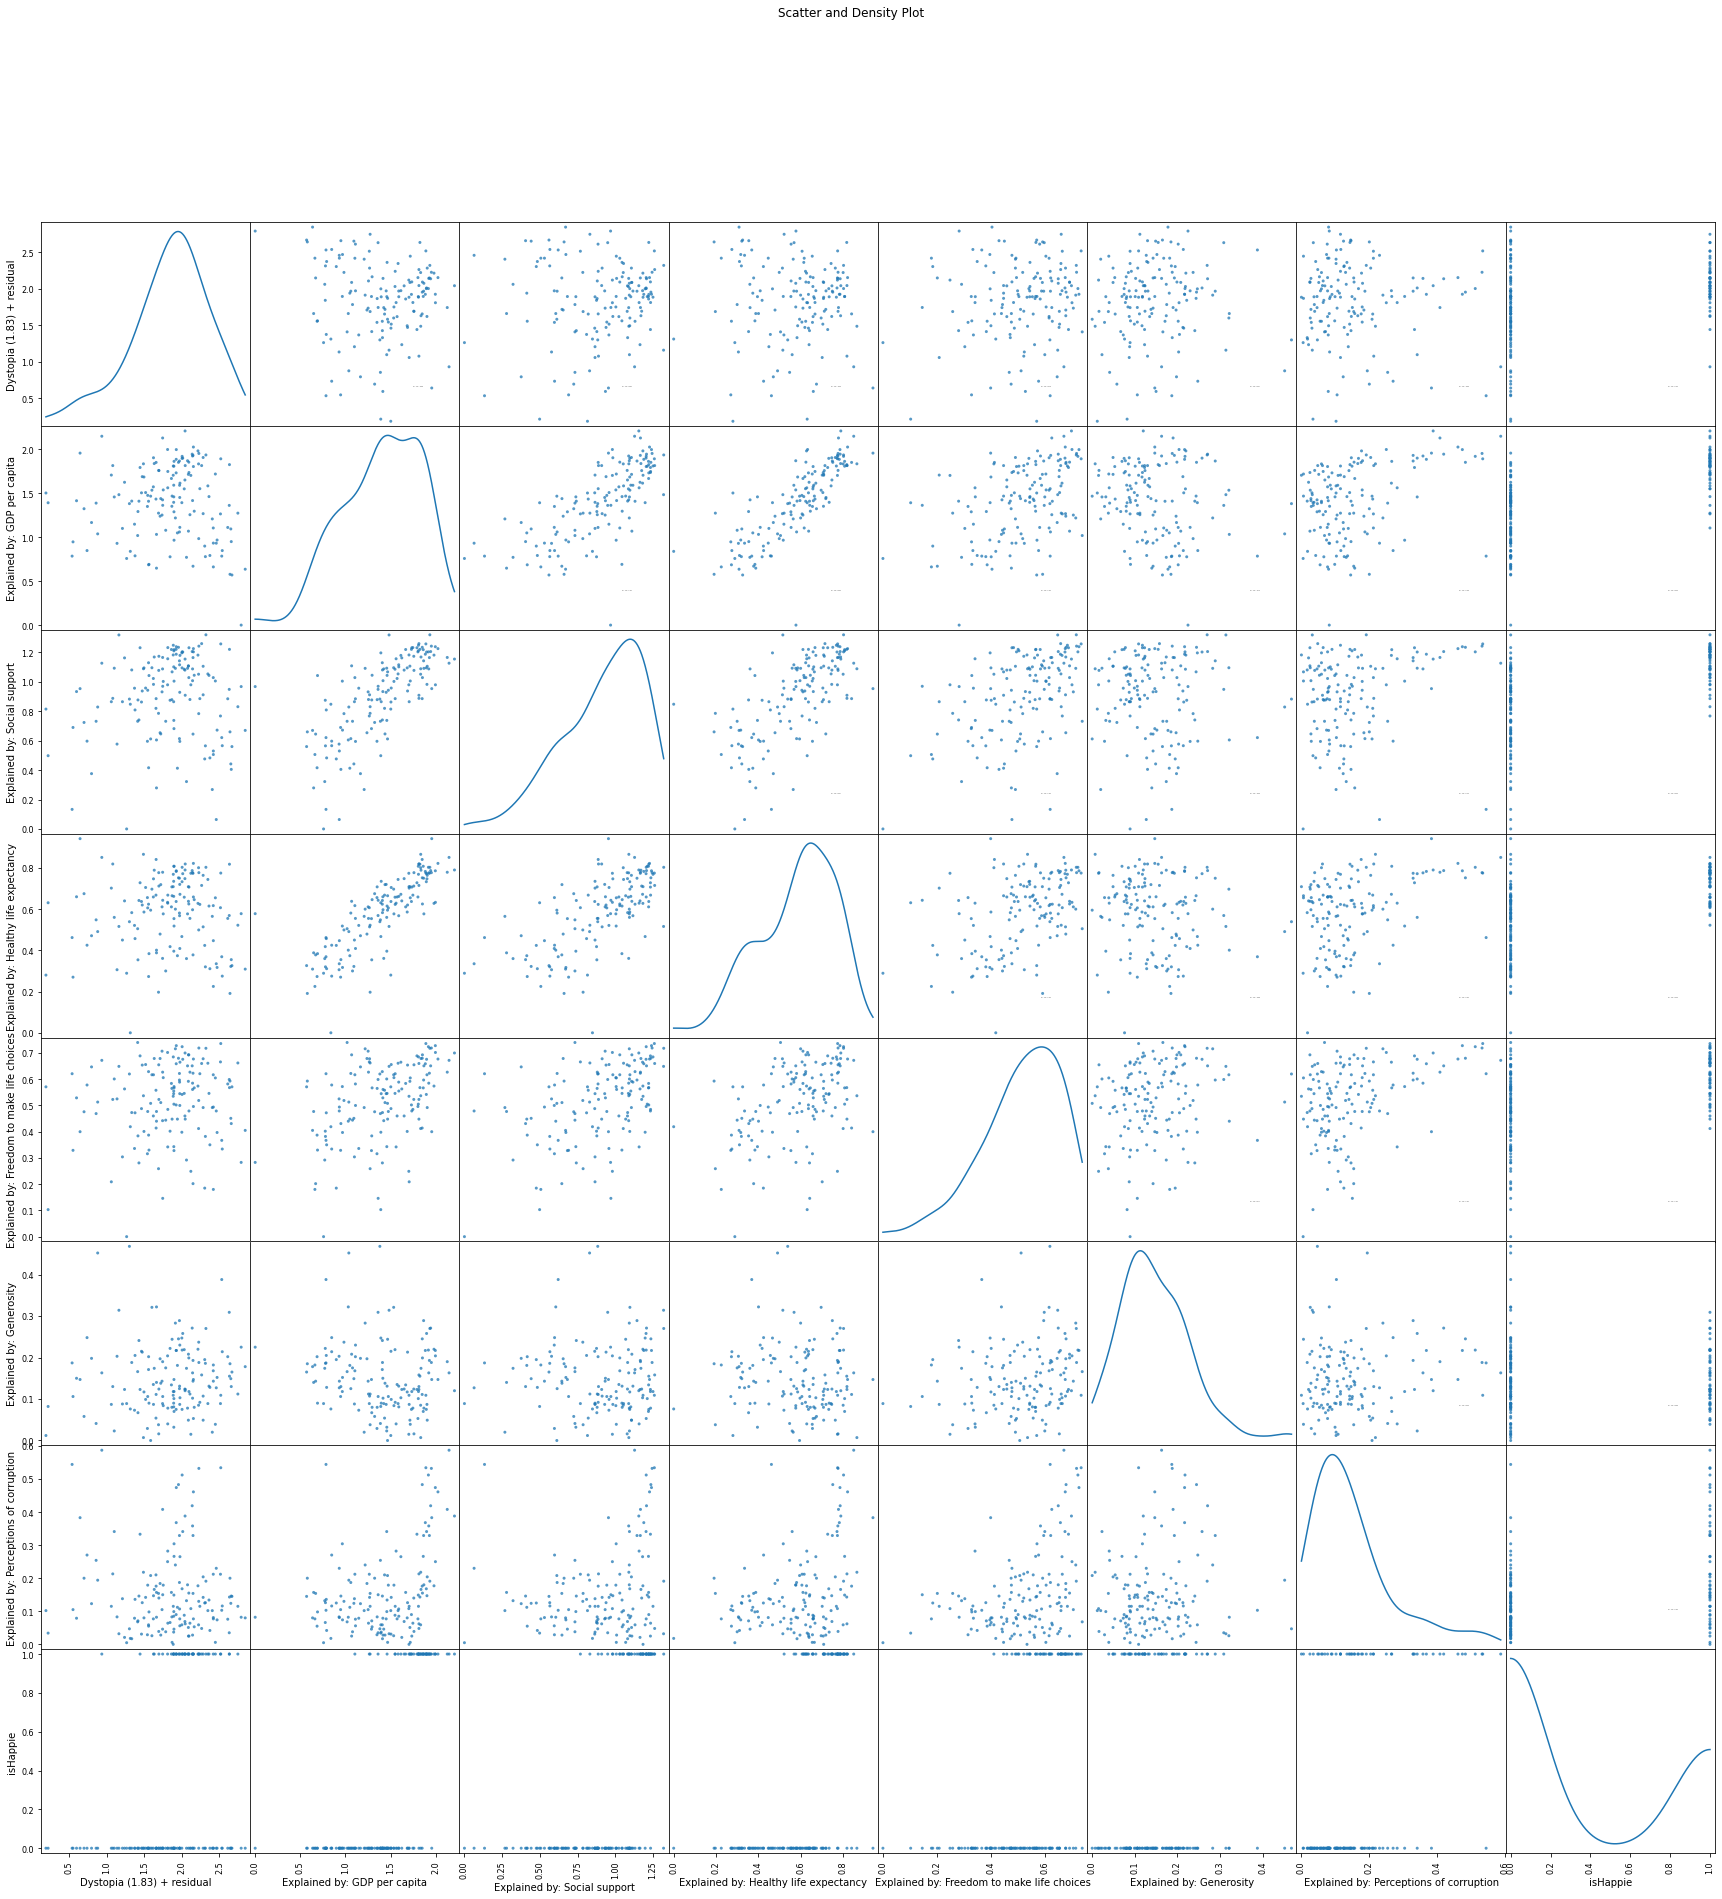

In [53]:
plotScatterMatrix(world_Happines,30,1)

In [9]:
lst1=[1]*50
lst2=[0]*96
Happie=lst1+lst2

In [10]:
world_Happines["isHappie"]=Happie

In [11]:
world_Happines=world_Happines.drop(columns=["Happiness score","Country","RANK","Whisker-high","Whisker-low"],axis=1)

In [12]:
world_Happines

,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,isHappie
0,2.518,1.892,1.258,0.775,0.736,0.109,0.534,1
1,2.226,1.953,1.243,0.777,0.719,0.188,0.532,1
2,2.320,1.936,1.320,0.803,0.718,0.270,0.191,1
3,2.153,2.026,1.226,0.822,0.677,0.147,0.461,1
4,2.137,1.945,1.206,0.787,0.651,0.271,0.419,1
...,...,...,...,...,...,...,...,...
141,0.187,1.503,0.815,0.280,0.571,0.012,0.102,0
142,0.536,0.785,0.133,0.462,0.621,0.187,0.544,0
143,0.548,0.947,0.690,0.270,0.329,0.106,0.105,0
144,0.216,1.392,0.498,0.631,0.103,0.082,0.034,0


In [13]:
X=world_Happines.drop("isHappie",axis=1)
Y=world_Happines["isHappie"]

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [16]:
len(x_train),len(y_train),len(x_test),len(y_test)

(116, 116, 30, 30)

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
import numpy as np

In [19]:
np.random.seed(seed=41)
model=RandomForestClassifier(n_estimators=100)
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.9

In [20]:
x_test.iloc[0:1]

,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
68,1.751,1.538,1.003,0.577,0.606,0.084,0.179


In [21]:
y_pred=model.predict(x_test.iloc[0:1])

In [22]:
y_test.iloc[0:1]

68    0
Name: isHappie, dtype: int64

In [23]:
y_pred

array([0], dtype=int64)

In [24]:
y_pred=model.predict(x_test)

In [25]:
y_pred

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0], dtype=int64)

In [26]:
y_pred_proba=model.predict_proba(x_test)

In [27]:
y_pred_proba

array([[0.76, 0.24],
       [0.86, 0.14],
       [0.1 , 0.9 ],
       [0.52, 0.48],
       [0.86, 0.14],
       [1.  , 0.  ],
       [0.02, 0.98],
       [0.94, 0.06],
       [0.97, 0.03],
       [0.98, 0.02],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.56, 0.44],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.98, 0.02],
       [0.95, 0.05],
       [0.99, 0.01],
       [0.26, 0.74],
       [0.13, 0.87],
       [0.44, 0.56],
       [0.53, 0.47],
       [0.94, 0.06],
       [0.7 , 0.3 ],
       [0.07, 0.93],
       [0.55, 0.45],
       [0.93, 0.07],
       [0.33, 0.67],
       [0.98, 0.02],
       [0.64, 0.36]])

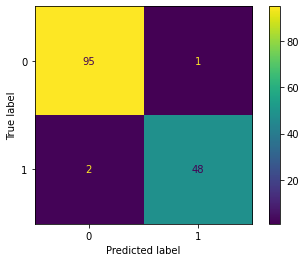

In [28]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(estimator=model,X=X,y=Y)

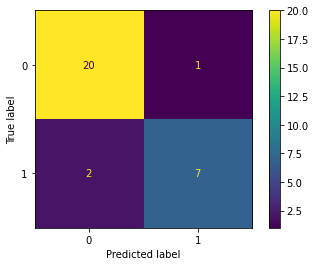

In [29]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test,y_pred=y_pred)

In [30]:
world_Happines.isna().sum()

Dystopia (1.83) + residual                    0
Explained by: GDP per capita                  0
Explained by: Social support                  0
Explained by: Healthy life expectancy         0
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
isHappie                                      0
dtype: int64

In [31]:
np.random.seed(seed=41)
def get_by_GDP_Per_Capita(DS):
    x_train,x_test,y_train,y_test=train_test_split(pd.DataFrame(DS["Explained by: GDP per capita"],columns=["Explained by: GDP per capita"]),pd.DataFrame(DS["isHappie"],columns=["isHappie"]),test_size=0.2)
    getByGDP=RandomForestClassifier(n_estimators=100)
    getByGDP.fit(x_train,y_train)
    return getByGDP.score(x_test,y_test)

In [32]:
np.random.seed(seed=41)
def get_by_Social_Support(DS):
    x_train,x_test,y_train,y_test=train_test_split(pd.DataFrame(DS["Explained by: Social support"],columns=["Explained by: Social support"]),pd.DataFrame(DS["isHappie"],columns=["isHappie"]),test_size=0.2)
    getByGDP=RandomForestClassifier(n_estimators=100)
    getByGDP.fit(x_train,y_train)
    return getByGDP.score(x_test,y_test)

In [33]:
np.random.seed(seed=41)
def get_by_Health_Life_Exceptence(DS):
    x_train,x_test,y_train,y_test=train_test_split(pd.DataFrame(DS["Explained by: Healthy life expectancy"],columns=["Explained by: Healthy life expectancy"]),pd.DataFrame(DS["isHappie"],columns=["isHappie"]),test_size=0.2)
    getByGDP=RandomForestClassifier(n_estimators=100)
    getByGDP.fit(x_train,y_train)
    return getByGDP.score(x_test,y_test)

In [34]:
np.random.seed(seed=41)
def get_by_Freedom_to_make_life_Choices(DS):
    x_train,x_test,y_train,y_test=train_test_split(pd.DataFrame(DS["Explained by: Freedom to make life choices"],columns=["Explained by: Freedom to make life choices"]),pd.DataFrame(DS["isHappie"],columns=["isHappie"]),test_size=0.2)
    getByGDP=RandomForestClassifier(n_estimators=100)
    getByGDP.fit(x_train,y_train)
    return getByGDP.score(x_test,y_test)

In [35]:
np.random.seed(seed=41)
def get_by_Generosity(DS):
    x_train,x_test,y_train,y_test=train_test_split(pd.DataFrame(DS["Explained by: Generosity"],columns=["Explained by: Generosity"]),pd.DataFrame(DS["isHappie"],columns=["isHappie"]),test_size=0.2)
    getByGDP=RandomForestClassifier(n_estimators=100)
    getByGDP.fit(x_train,y_train)
    return getByGDP.score(x_test,y_test)

In [36]:
np.random.seed(seed=41)
def get_by_Perceptions_of_corruption(DS):
    x_train,x_test,y_train,y_test=train_test_split(pd.DataFrame(DS["Explained by: Perceptions of corruption"],columns=["Explained by: Perceptions of corruption"]),pd.DataFrame(DS["isHappie"],columns=["isHappie"]),test_size=0.2)
    getByGDP=RandomForestClassifier(n_estimators=100)
    getByGDP.fit(x_train,y_train)
    return getByGDP.score(x_test,y_test)

In [37]:
GDP=get_by_GDP_Per_Capita(world_Happines)

C:\Users\Hello\AppData\Local\Temp\ipykernel_13152\218435742.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  getByGDP.fit(x_train,y_train)


In [38]:
SocialSupport=get_by_Social_Support(world_Happines)

C:\Users\Hello\AppData\Local\Temp\ipykernel_13152\452184060.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  getByGDP.fit(x_train,y_train)


In [39]:
HealthExceptence=get_by_Health_Life_Exceptence(world_Happines)

C:\Users\Hello\AppData\Local\Temp\ipykernel_13152\1436461132.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  getByGDP.fit(x_train,y_train)


In [40]:
FreeDomToMakeLifeChoices=get_by_Freedom_to_make_life_Choices(world_Happines)

C:\Users\Hello\AppData\Local\Temp\ipykernel_13152\879531704.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  getByGDP.fit(x_train,y_train)


In [41]:
Generosity=get_by_Generosity(world_Happines)

C:\Users\Hello\AppData\Local\Temp\ipykernel_13152\642449041.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  getByGDP.fit(x_train,y_train)


In [42]:
Corruptions=get_by_Perceptions_of_corruption(world_Happines)

C:\Users\Hello\AppData\Local\Temp\ipykernel_13152\558025869.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  getByGDP.fit(x_train,y_train)


In [43]:
REPORT=pd.DataFrame([GDP,SocialSupport,HealthExceptence,FreeDomToMakeLifeChoices,Generosity,Corruptions],columns=["RandomForestClassifier"],index=["GDP per capita","Social support","Healthy life expectancy","Freedom to make life choices","Generosity","Perceptions of corruption"])

In [44]:
REPORT

,RandomForestClassifier
GDP per capita,0.700000
Social support,0.466667
Healthy life expectancy,0.733333
Freedom to make life choices,0.533333
Generosity,0.666667
Perceptions of corruption,0.733333


<AxesSubplot:>

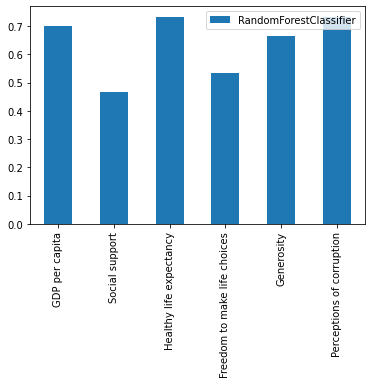

In [51]:
REPORT.plot.bar()